In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("/Users/arakikentarou/Desktop/kinoko.csv")

In [4]:
data

,傘の重さ(g),柄の長さ(mm),柄の外径(mm),柄の内径,柄の断面積(cm2),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,43.99,172.0,14.10,NaN,C,NaN,NaN,NaN
1,6.42,68.0,14.20,9.4,A,NaN,NaN,NaN
2,8.63,92.0,11.40,NaN,B,NaN,NaN,NaN
3,4.70,74.0,9.64,NaN,B,NaN,NaN,NaN
4,6.85,66.0,14.00,7.8,C,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
252,0.19,18.0,3.40,1.4,A,NaN,NaN,NaN
253,0.11,51.0,1.30,0.6,A,NaN,NaN,NaN
254,0.11,54.0,1.30,0.9,A,NaN,NaN,NaN
255,0.10,40.0,1.40,0.8,A,NaN,NaN,NaN


In [5]:
chuuku = data[data["柄の断面積(cm2)"]=="A"].copy()
tsumari = data[data["柄の断面積(cm2)"]=="B"].copy()
fuwafuwa = data[data["柄の断面積(cm2)"]=="C"].copy()

In [6]:
chuuku["断面積(cm2)"]=np.pi / 4 * (chuuku["柄の外径(mm)"]**2 - chuuku["柄の内径"]**2)
tsumari["断面積(cm2)"]= np.pi / 4 * (tsumari["柄の外径(mm)"]**2)
fuwafuwa["断面積(cm2)"]= np.pi / 4 * (fuwafuwa["柄の外径(mm)"]**2 - fuwafuwa["柄の内径"]**2)

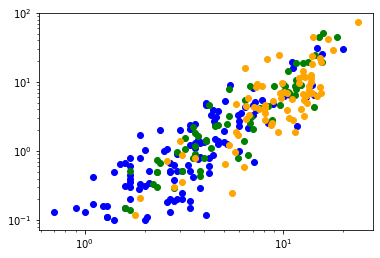

In [7]:
plt.scatter(chuuku["柄の外径(mm)"],chuuku["傘の重さ(g)"],color="blue")
plt.scatter(tsumari["柄の外径(mm)"],tsumari["傘の重さ(g)"],color="green")
plt.scatter(fuwafuwa["柄の外径(mm)"],fuwafuwa["傘の重さ(g)"],color="orange")
plt.xscale("log")
plt.yscale("log")

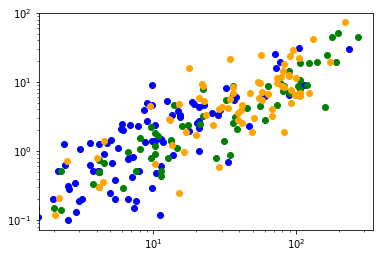

In [8]:
plt.scatter(chuuku["断面積(cm2)"],chuuku["傘の重さ(g)"],color="blue")
plt.scatter(tsumari["断面積(cm2)"],tsumari["傘の重さ(g)"],color="green")
plt.scatter(fuwafuwa["断面積(cm2)"],fuwafuwa["傘の重さ(g)"],color="orange")
plt.xscale("log")
plt.yscale("log")

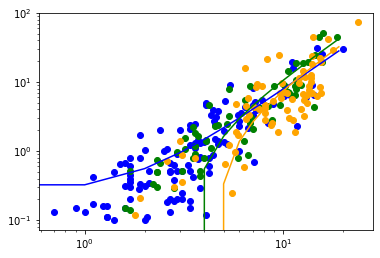

In [83]:
x_param = "柄の外径(mm)"
y_param = "傘の重さ(g)"


lr_chuku = LinearRegression()
X_chuku = np.array((chuuku[x_param][[not i for i in ([i for i in chuuku[y_param].isna()] or [i for i in chuuku[x_param].isna()])]])**2).reshape(-1,1)
Y_chuku = chuuku[y_param][[not i for i in ([i for i in chuuku[y_param].isna()] or [i for i in chuuku[x_param].isna()])]]
lr_chuku.fit(X_chuku,Y_chuku)

lr_fuwafuwa = LinearRegression()
X_fuwafuwa = np.array(fuwafuwa[x_param][[not i for i in ([i for i in fuwafuwa[y_param].isna()] or [i for i in fuwafuwa[x_param].isna()])]]**2).reshape(-1,1)
Y_fuwafuwa = fuwafuwa[y_param][[not i for i in ([i for i in fuwafuwa[y_param].isna()] or [i for i in fuwafuwa[x_param].isna()])]]
lr_fuwafuwa.fit(X_fuwafuwa,Y_fuwafuwa)

lr_tsumari = LinearRegression()
X_tsumari = np.array((tsumari[x_param][[not i for i in ([i for i in tsumari[y_param].isna()] or [i for i in tsumari[x_param].isna()])]]**2)).reshape(-1,1)
Y_tsumari = tsumari[y_param][[not i for i in ([i for i in tsumari[x_param].isna()] or [i for i in tsumari[y_param].isna()])]]
lr_tsumari.fit(X_tsumari,Y_tsumari)

plt.scatter(chuuku[x_param],chuuku[y_param],color="blue")
plt.scatter(tsumari[x_param],tsumari[y_param],color="green")
plt.scatter(fuwafuwa[x_param],fuwafuwa[y_param],color="orange")
x = np.array(range(0,20)).reshape(-1,1)
y_chuku = lr_chuku.predict(x**2)
plt.plot(x,y_chuku,color="blue")
y_tsumari = lr_tsumari.predict(x**2)
plt.plot(x,y_tsumari,color="green")
y_fuwafuwa = lr_fuwafuwa.predict(x**2)
plt.plot(x,y_fuwafuwa,color="orange")


plt.xscale("log")
plt.yscale("log")

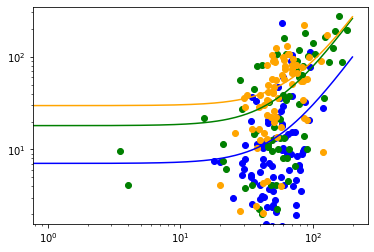

In [82]:
x_param = "柄の長さ(mm)"
y_param = "断面積(cm2)"


lr_chuku = LinearRegression()
X_chuku = np.array((chuuku[x_param][[not i for i in ([i for i in chuuku[y_param].isna()] or [i for i in chuuku[x_param].isna()])]])**2).reshape(-1,1)
Y_chuku = chuuku[y_param][[not i for i in ([i for i in chuuku[y_param].isna()] or [i for i in chuuku[x_param].isna()])]]
lr_chuku.fit(X_chuku,Y_chuku)

lr_fuwafuwa = LinearRegression()
X_fuwafuwa = np.array(fuwafuwa[x_param][[not i for i in ([i for i in fuwafuwa[y_param].isna()] or [i for i in fuwafuwa[x_param].isna()])]]**2).reshape(-1,1)
Y_fuwafuwa = fuwafuwa[y_param][[not i for i in ([i for i in fuwafuwa[y_param].isna()] or [i for i in fuwafuwa[x_param].isna()])]]
lr_fuwafuwa.fit(X_fuwafuwa,Y_fuwafuwa)

lr_tsumari = LinearRegression()
X_tsumari = np.array((tsumari[x_param][[not i for i in ([i for i in tsumari[y_param].isna()] or [i for i in tsumari[x_param].isna()])]]**2)).reshape(-1,1)
Y_tsumari = tsumari[y_param][[not i for i in ([i for i in tsumari[x_param].isna()] or [i for i in tsumari[y_param].isna()])]]
lr_tsumari.fit(X_tsumari,Y_tsumari)

plt.scatter(chuuku[x_param],chuuku[y_param],color="blue")
plt.scatter(tsumari[x_param],tsumari[y_param],color="green")
plt.scatter(fuwafuwa[x_param],fuwafuwa[y_param],color="orange")
x = np.array(range(0,200)).reshape(-1,1)
y_chuku = lr_chuku.predict(x**2)
plt.plot(x,y_chuku,color="blue")
y_tsumari = lr_tsumari.predict(x**2)
plt.plot(x,y_tsumari,color="green")
y_fuwafuwa = lr_fuwafuwa.predict(x**2)
plt.plot(x,y_fuwafuwa,color="orange")

plt.xscale("log")
plt.yscale("log")

In [12]:
chuuku[y_param][[not i for i in chuuku[x_param].isna()]]

1      88.969904
7      20.828759
9            NaN
10      4.492792
11           NaN
         ...    
251     7.312057
252     7.539822
253     1.044580
254     0.691150
255     1.036726
Name: 断面積(cm2), Length: 117, dtype: float64

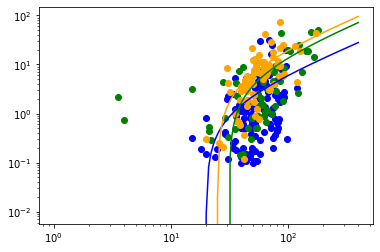

In [36]:
x_param = "柄の長さ(mm)"
y_param = "傘の重さ(g)"

lr_chuku = LinearRegression()
X_chuku = np.array(chuuku[x_param][[not i for i in ([i for i in chuuku[x_param].isna()] or [i for i in chuuku[y_param].isna()])]]).reshape(-1,1)
Y_chuku = chuuku[y_param][[not i for i in ([i for i in chuuku[x_param].isna()] or [i for i in chuuku[y_param].isna()])]]
lr_chuku.fit(X_chuku,Y_chuku)

lr_fuwafuwa = LinearRegression()
X_fuwafuwa = np.array(fuwafuwa[x_param][[not i for i in ([i for i in fuwafuwa[x_param].isna()] or [i for i in fuwafuwa[y_param].isna()])]]).reshape(-1,1)
Y_fuwafuwa = fuwafuwa[y_param][[not i for i in ([i for i in fuwafuwa[x_param].isna()] or [i for i in fuwafuwa[y_param].isna()])]]
lr_fuwafuwa.fit(X_fuwafuwa,Y_fuwafuwa)

lr_tsumari = LinearRegression()
X_tsumari = np.array(tsumari[x_param][[not i for i in ([i for i in tsumari[x_param].isna()] or [i for i in tsumari[y_param].isna()])]]).reshape(-1,1)
Y_tsumari = tsumari[y_param][[not i for i in ([i for i in tsumari[x_param].isna()] or [i for i in tsumari[y_param].isna()])]]
lr_tsumari.fit(X_tsumari,Y_tsumari)

plt.scatter(chuuku[x_param],chuuku[y_param],color="blue")
plt.scatter(tsumari[x_param],tsumari[y_param],color="green")
plt.scatter(fuwafuwa[x_param],fuwafuwa[y_param],color="orange")
x = np.array(range(0,400)).reshape(-1,1)
y_chuku = lr_chuku.predict(x)
plt.plot(x,y_chuku,color="blue")
y_tsumari = lr_tsumari.predict(x)
plt.plot(x,y_tsumari,color="green")
y_fuwafuwa = lr_fuwafuwa.predict(x)
plt.plot(x,y_fuwafuwa,color="orange")


plt.xscale("log")
plt.yscale("log")

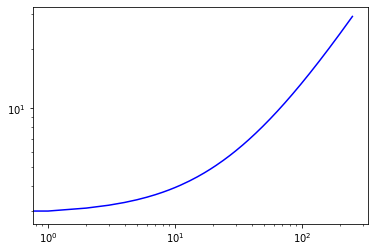

In [59]:
x_param = "断面積(cm2)"
y_param = "柄の外径(mm)"

lr_chuku = LinearRegression()
X_chuku = np.array(chuuku[x_param][[not i for i in ([i for i in chuuku[x_param].isna()] or [i for i in chuuku[y_param].isna()])]]).reshape(-1,1)
Y_chuku = chuuku[y_param][[not i for i in ([i for i in chuuku[x_param].isna()] or [i for i in chuuku[y_param].isna()])]]
lr_chuku.fit(X_chuku,Y_chuku)

lr_fuwafuwa = LinearRegression()
X_fuwafuwa = np.array(fuwafuwa[x_param][[not i for i in ([i for i in fuwafuwa[x_param].isna()] or [i for i in fuwafuwa[y_param].isna()])]]).reshape(-1,1)
Y_fuwafuwa = fuwafuwa[y_param][[not i for i in ([i for i in fuwafuwa[x_param].isna()] or [i for i in fuwafuwa[y_param].isna()])]]
lr_fuwafuwa.fit(X_fuwafuwa,Y_fuwafuwa)

lr_tsumari = LinearRegression()
X_tsumari = np.array(tsumari[x_param][[not i for i in ([i for i in tsumari[x_param].isna()] or [i for i in tsumari[y_param].isna()])]]).reshape(-1,1)
Y_tsumari = tsumari[y_param][[not i for i in ([i for i in tsumari[x_param].isna()] or [i for i in tsumari[y_param].isna()])]]
lr_tsumari.fit(X_tsumari,Y_tsumari)

#plt.scatter(chuuku[x_param],chuuku[y_param],color="blue")
#plt.scatter(tsumari[x_param],tsumari[y_param],color="green")
#plt.scatter(fuwafuwa[x_param],fuwafuwa[y_param],color="orange")
x = np.array(range(0,250)).reshape(-1,1)
y_chuku = lr_chuku.predict(x)
plt.plot(x,y_chuku,color="blue")
y_tsumari = lr_tsumari.predict(x)
#plt.plot(x,y_tsumari,color="green")
y_fuwafuwa = lr_fuwafuwa.predict(x)
#plt.plot(x,y_fuwafuwa,color="orange")


plt.xscale("log")
plt.yscale("log")

<AxesSubplot:>

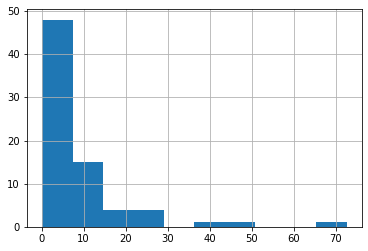

In [15]:
fuwafuwa["傘の重さ(g)"].hist()

In [16]:
data_for_moment = data.copy()
data_for_moment["柄の内径"]=data_for_moment["柄の内径"].fillna(0)
data_for_moment["断面２次モーメント"] = np.pi / 2 * ((data_for_moment["柄の外径(mm)"]/2)**4 - (data_for_moment["柄の内径"]/2)**4)

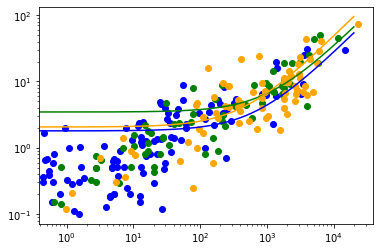

In [72]:
x_param = "断面２次モーメント"
y_param = "傘の重さ(g)"

lr_chuku = LinearRegression()
X_chuku = np.array(data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][x_param][[not i for i in ([i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][x_param].isna()] or [i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][y_param].isna()])]]).reshape(-1,1)
Y_chuku = data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][y_param][[not i for i in ([i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][x_param].isna()] or [i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][y_param].isna()])]]
lr_chuku.fit(X_chuku,Y_chuku)

lr_fuwafuwa = LinearRegression()
X_fuwafuwa = np.array(data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][x_param][[not i for i in ([i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][x_param].isna()] or [i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][y_param].isna()])]]).reshape(-1,1)
Y_fuwafuwa = data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][y_param][[not i for i in ([i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][x_param].isna()] or [i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][y_param].isna()])]]
lr_fuwafuwa.fit(X_fuwafuwa,Y_fuwafuwa)

lr_tsumari = LinearRegression()
X_tsumari = np.array(data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][x_param][[not i for i in ([i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][x_param].isna()] or [i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][y_param].isna()])]]).reshape(-1,1)
Y_tsumari = data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][y_param][[not i for i in ([i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][x_param].isna()] or [i for i in data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][y_param].isna()])]]
lr_tsumari.fit(X_tsumari,Y_tsumari)

plt.scatter(data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][x_param],data_for_moment[data_for_moment["柄の断面積(cm2)"]=="A"][y_param],color="blue")
plt.scatter(data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][x_param],data_for_moment[data_for_moment["柄の断面積(cm2)"]=="B"][y_param],color="green")
plt.scatter(data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][x_param],data_for_moment[data_for_moment["柄の断面積(cm2)"]=="C"][y_param],color="orange")
x = np.array(range(0,20000)).reshape(-1,1)
y_chuku = lr_chuku.predict(x)
plt.plot(x,y_chuku,color="blue")
y_tsumari = lr_tsumari.predict(x)
plt.plot(x,y_tsumari,color="green")
y_fuwafuwa = lr_fuwafuwa.predict(x)
plt.plot(x,y_fuwafuwa,color="orange")
#plt.xlim(0,5000)
#plt.ylim(0,30)
plt.xscale("log")
plt.yscale("log")


In [18]:
data_for_pca = data[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)","柄の断面積(cm2)"]]

In [19]:
from sklearn.decomposition import PCA

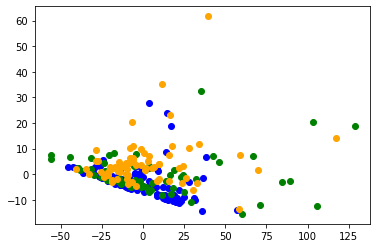

In [38]:
pca = PCA()
pca.fit(data_for_pca[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)"]])
pca_chuuku = pca.transform(data_for_pca[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)"]][data_for_pca["柄の断面積(cm2)"]=="A"])[:,(0,1)]
pca_tsumari = pca.transform(data_for_pca[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)"]][data_for_pca["柄の断面積(cm2)"]=="B"])[:,(0,1)]
pca_fuwafuwa = pca.transform(data_for_pca[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)"]][data_for_pca["柄の断面積(cm2)"]=="C"])[:,(0,1)]

plt.scatter(pca_chuuku[:,0],pca_chuuku[:,1],color="blue")
plt.scatter(pca_tsumari[:,0],pca_tsumari[:,1],color="green")
plt.scatter(pca_fuwafuwa[:,0],pca_fuwafuwa[:,1],color="orange")



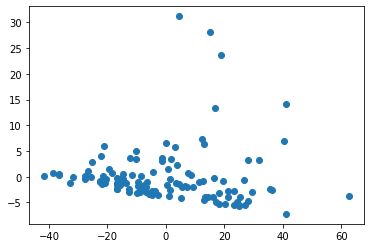

In [29]:
pca_chuuku_only = PCA()
pca_chuuku_only.fit(data_for_pca[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)"]][data_for_pca["柄の断面積(cm2)"]=="A"])
pca_chuuku_only_result = pca_chuuku_only.transform(data_for_pca[["傘の重さ(g)","柄の長さ(mm)","柄の外径(mm)"]][data_for_pca["柄の断面積(cm2)"]=="A"])[:,(0,1)]
plt.scatter(pca_chuuku_only_result[:,0],pca_chuuku_only_result[:,1])

In [74]:
data_for_euler = data_for_moment.copy()
data_for_euler["オイラー座屈/(pi2E/alpha2)"] = data_for_euler["断面２次モーメント"]/(data_for_euler["柄の長さ(mm)"]**2)

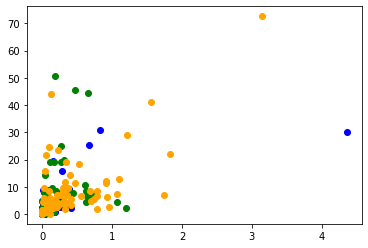

In [88]:
x_param = "オイラー座屈/(pi2E/alpha2)"
y_param = "傘の重さ(g)"

lr_chuku = LinearRegression()
X_chuku = np.array(data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][x_param][[not i for i in ([i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][x_param].isna()] or [i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][y_param].isna()])]]).reshape(-1,1)
Y_chuku = data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][y_param][[not i for i in ([i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][x_param].isna()] or [i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][y_param].isna()])]]
lr_chuku.fit(X_chuku,Y_chuku)

lr_fuwafuwa = LinearRegression()
X_fuwafuwa = np.array(data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][x_param][[not i for i in ([i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][x_param].isna()] or [i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][y_param].isna()])]]).reshape(-1,1)
Y_fuwafuwa = data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][y_param][[not i for i in ([i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][x_param].isna()] or [i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][y_param].isna()])]]
lr_fuwafuwa.fit(X_fuwafuwa,Y_fuwafuwa)

lr_tsumari = LinearRegression()
X_tsumari = np.array(data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][x_param][[not i for i in ([i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][x_param].isna()] or [i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][y_param].isna()])]]).reshape(-1,1)
Y_tsumari = data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][y_param][[not i for i in ([i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][x_param].isna()] or [i for i in data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][y_param].isna()])]]
lr_tsumari.fit(X_tsumari,Y_tsumari)

plt.scatter(data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][x_param],data_for_euler[data_for_euler["柄の断面積(cm2)"]=="A"][y_param],color="blue")
plt.scatter(data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][x_param],data_for_euler[data_for_euler["柄の断面積(cm2)"]=="B"][y_param],color="green")
plt.scatter(data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][x_param],data_for_euler[data_for_euler["柄の断面積(cm2)"]=="C"][y_param],color="orange")
x = np.array(range(0,5)).reshape(-1,1)
y_chuku = lr_chuku.predict(x)
#plt.plot(x,y_chuku,color="blue")
y_tsumari = lr_tsumari.predict(x)
#plt.plot(x,y_tsumari,color="green")
y_fuwafuwa = lr_fuwafuwa.predict(x)
#plt.plot(x,y_fuwafuwa,color="orange")
#plt.xlim(0,5000)
#plt.ylim(0,30)
#plt.xscale("log")
#plt.yscale("log")

,傘の重さ(g),柄の長さ(mm),柄の外径(mm),柄の内径,柄の断面積(cm2),Unnamed: 5,Unnamed: 6,Unnamed: 7,断面２次モーメント,オイラー座屈/(pi2E/alpha2)
0,43.99,172.0,14.10,0.0,C,NaN,NaN,NaN,3880.398652,0.131165
1,6.42,68.0,14.20,9.4,A,NaN,NaN,NaN,3225.159018,0.697482
2,8.63,92.0,11.40,0.0,B,NaN,NaN,NaN,1658.132760,0.195904
3,4.70,74.0,9.64,0.0,B,NaN,NaN,NaN,847.828536,0.154826
4,6.85,66.0,14.00,7.8,C,NaN,NaN,NaN,3408.087518,0.782389
...,...,...,...,...,...,...,...,...,...,...
252,0.19,18.0,3.40,1.4,A,NaN,NaN,NaN,12.742300,0.039328
253,0.11,51.0,1.30,0.6,A,NaN,NaN,NaN,0.267674,0.000103
254,0.11,54.0,1.30,0.9,A,NaN,NaN,NaN,0.215984,0.000074
255,0.10,40.0,1.40,0.8,A,NaN,NaN,NaN,0.336936,0.000211
